In [19]:
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def make_A(G:nx.classes.digraph.DiGraph):
    
    #点の個数を取得
    n = nx.number_of_nodes(G)

    #Aの行列を作成
    A = nx.to_numpy_array(G, nodelist=range(n), weight=None)

    #行列の転置
    A = A.transpose()

    #各列の和を取る
    clos_sum = A.sum(axis=0)

    # n回for分を回す。
    for s in range(n):

        # s列の和が0のとき、
        if clos_sum[s] == 0:

            # s列の要素をすべて1/nにする
            A[:, s] = 1/n
            continue

        # s列の和が0ではないとき、各列の値の和(clos_sum)で正規化する
        A[:,s] = A[:,s] / clos_sum[s]

    return A

In [3]:
G = nx.read_edgelist("pr.edgelist", create_using=nx.DiGraph(), nodetype=int)

A = make_A(G)
print(A)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.08333333 0.08333333]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.08333333 0.08333333]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.08333333 0.08333333]
 [0.33333333 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.08333333 0.08333333]
 [0.         0.5        0.         1.         0.         0.
  0.         0.         0.         0.         0.08333333 0.08333333]
 [0.33333333 0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.08333333 0.08333333]
 [0.         0.5        0.         0.         0.         0.5
  0.         0.         0.         0.         0.08333333 0.08333333]
 [0.33333333 0.         0.         0.         0.         0.
  0.         0.         0.         0

## (2)

In [8]:
def update(G, v, d, k):

    # Aを作成する
    A = make_A(G)

    # Gの点の数を取得
    n = nx.number_of_nodes(G)

    # n行n列で値が1/nの行列Jを作成
    J = np.ones((n, n))/n

    # Mgを作成
    Mg = d * A + (1-d)*J
    
    # K回、行列Mgと重要度ベクトルvの積を取る
    for _ in range(k):
        v = Mg @ v

    return v


In [39]:
G = nx.read_edgelist("pr.edgelist", create_using=nx.DiGraph(), nodetype=int)

n = nx.number_of_nodes(G)
v = np.ones((n, 1))/n

d = 0.85

k = 5

y = update(G, v, d, k)

print(y)

[[0.0307301 ]
 [0.0307301 ]
 [0.0307301 ]
 [0.03957539]
 [0.07744817]
 [0.10271449]
 [0.08555956]
 [0.03957539]
 [0.09786197]
 [0.18825917]
 [0.05630046]
 [0.22051509]]


In [48]:
G = nx.read_edgelist("pr.edgelist", create_using=nx.DiGraph(), nodetype=int)

n = nx.number_of_nodes(G)
v = np.ones((n, 1))/n

d = 0.85

K = 23

diff_results = []

pr = nx.pagerank(G, alpha=d)

pr_result = np.array([pr[s] for s in range(n)])

for k in range(1, K+1):

    y = update(G, v, d, k)

    y_result =np.array([s[0] for s in y])

    diff = sum(np.abs(pr_result - y_result))

    diff_results.append(diff)

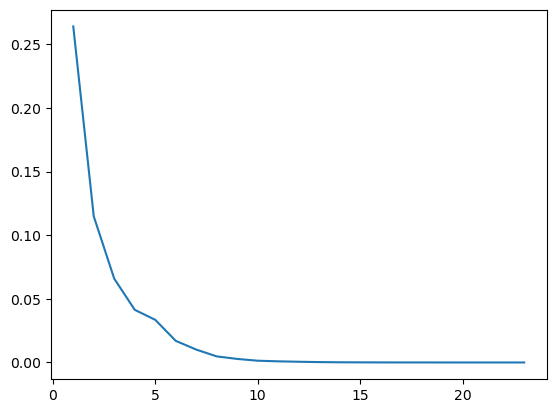

In [49]:
x = [s for s in range(1, K+1)]

plt.plot(x, diff_results)

plt.show()

In [53]:
print(diff_results)

for s in range(1, 23):
    print(s, ": ", "{:.15f}".format(diff_results[s-1]))


[0.26393899764424444, 0.11476898945170641, 0.06580071154905417, 0.04137521404658065, 0.03349076516939928, 0.01698978035215544, 0.010126542182928178, 0.004783235368722005, 0.0027909235277516938, 0.0013821347493185483, 0.0009012974024523376, 0.0005706692904859714, 0.00030174692358783325, 0.00014939801754267415, 9.805586029991431e-05, 4.6473429183929715e-05, 2.8045158016881677e-05, 2.3373844345364603e-05, 9.656930138622621e-06, 8.326672684688674e-16, 5.36050116526493e-06, 6.212285048743521e-06, 6.405374052068091e-06]
1 :  0.263938997644244
2 :  0.114768989451706
3 :  0.065800711549054
4 :  0.041375214046581
5 :  0.033490765169399
6 :  0.016989780352155
7 :  0.010126542182928
8 :  0.004783235368722
9 :  0.002790923527752
10 :  0.001382134749319
11 :  0.000901297402452
12 :  0.000570669290486
13 :  0.000301746923588
14 :  0.000149398017543
15 :  0.000098055860300
16 :  0.000046473429184
17 :  0.000028045158017
18 :  0.000023373844345
19 :  0.000009656930139
20 :  0.000000000000001
21 :  0.0